In [ ]:
!ln -s /content/drive/MyDrive/FMT ./fmt

ln: failed to create symbolic link './fmt/FMT': File exists


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
deslocamento = pd.DataFrame([0.0173, 0.0345, 0.0518, 0.0691, 0.0864, 0.1036, 0.1209, 0.1382, 0.1554, 0.1727])

# Massas

M1: 2 e 5
M2: 6 e 4

In [ ]:
df = pd.read_csv('./fmt/relatorio_5/movimento_retilineo.csv', names = ["tempo_1", "tempo_2", "tempo_3", "tempo_4", "tempo_5", "media"])

In [ ]:
df = df.replace(',', '.', regex = True)

In [ ]:
df

,tempo_1,tempo_2,tempo_3,tempo_4,tempo_5,media
0,Primeiro conjunto de massas,NaN,NaN,NaN,NaN,NaN
1,tempo_1,tempo_2,tempo_3,tempo_4,tempo_5,media
2,0.14120,0.14365,0.19485,0.10750,0.11805,0.14105
3,0.22855,0.22845,0.28975,0.18350,0.19810,0.22567
4,0.29830,0.29655,0.36325,0.24720,0.26455,0.29397
5,0.35705,0.35555,0.42525,0.30345,0.32250,0.35276
6,0.40915,0.40845,0.47975,0.35435,0.37435,0.40521
7,0.45695,0.45655,0.52930,0.40190,0.42090,0.45312
8,0.50195,0.50085,0.57525,0.44605,0.46390,0.49760
9,0.54230,0.54240,0.61820,0.48735,0.50435,0.53892


# Gráficos

## Primeira coleta de dados

In [ ]:
df1 = df.loc[2:11].copy().reset_index().drop(columns = "index")

df1 = df1.astype("float")

In [ ]:
df1

,tempo_1,tempo_2,tempo_3,tempo_4,tempo_5,media
0,0.14120,0.14365,0.19485,0.10750,0.11805,0.14105
1,0.22855,0.22845,0.28975,0.18350,0.19810,0.22567
2,0.29830,0.29655,0.36325,0.24720,0.26455,0.29397
3,0.35705,0.35555,0.42525,0.30345,0.32250,0.35276
4,0.40915,0.40845,0.47975,0.35435,0.37435,0.40521
5,0.45695,0.45655,0.52930,0.40190,0.42090,0.45312
6,0.50195,0.50085,0.57525,0.44605,0.46390,0.49760
7,0.54230,0.54240,0.61820,0.48735,0.50435,0.53892
8,0.58130,0.58190,0.65890,0.52555,0.54250,0.57803
9,0.61710,0.61945,0.69750,0.56165,0.57880,0.61490


In [ ]:
x1_tempo = df1["media"]

y1_deslocamento = deslocamento[0]
y1_velocidade = (y1_deslocamento / x1_tempo)


erro_deslocamento = 0.009

std = df1.drop(columns = "media").std(axis = 1)
erro_tempo = std / np.sqrt(5)

erro_velocidade = y1_velocidade.mean() * ((erro_deslocamento) / y1_deslocamento.mean())

In [ ]:
erro_tempo

0    0.015093
1    0.018249
2    0.019847
3    0.020770
4    0.021356
5    0.021785
6    0.022195
7    0.022543
8    0.023002
9    0.023438
dtype: float64

### Modelo Linear para Velocidade x Tempo

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)

model.fit(x1_tempo[:, None], y1_velocidade)

xfit = np.linspace(0.1, 0.7, 10000)
yfit = model.predict(xfit[:, None])

<ipython-input-308-395b6871a4b3>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x1_tempo[:, None], y1_velocidade)


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x1_tempo[:, None], y1_velocidade, cv = 5)

scores.mean()

<ipython-input-309-8185a6b3a0f9>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores = cross_val_score(model, x1_tempo[:, None], y1_velocidade, cv = 5)


0.9669512745937239

In [ ]:
model.coef_

array([0.33181467])

### Modelo polinomial quadrático Deslocamento x tempo

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

In [ ]:
xfit_poly = np.linspace(0, 0.7, 1000)

poly_model.fit(x1_tempo[:, None], y1_deslocamento)
yfit_poly = poly_model.predict(xfit_poly[:, None])

<ipython-input-312-09b436aa5461>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(x1_tempo[:, None], y1_deslocamento)


In [ ]:
scores = cross_val_score(poly_model, x1_tempo[:, None], y1_velocidade, cv = 5)

scores.mean()

<ipython-input-313-665e4a41ab67>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores = cross_val_score(poly_model, x1_tempo[:, None], y1_velocidade, cv = 5)


0.9922772164563746

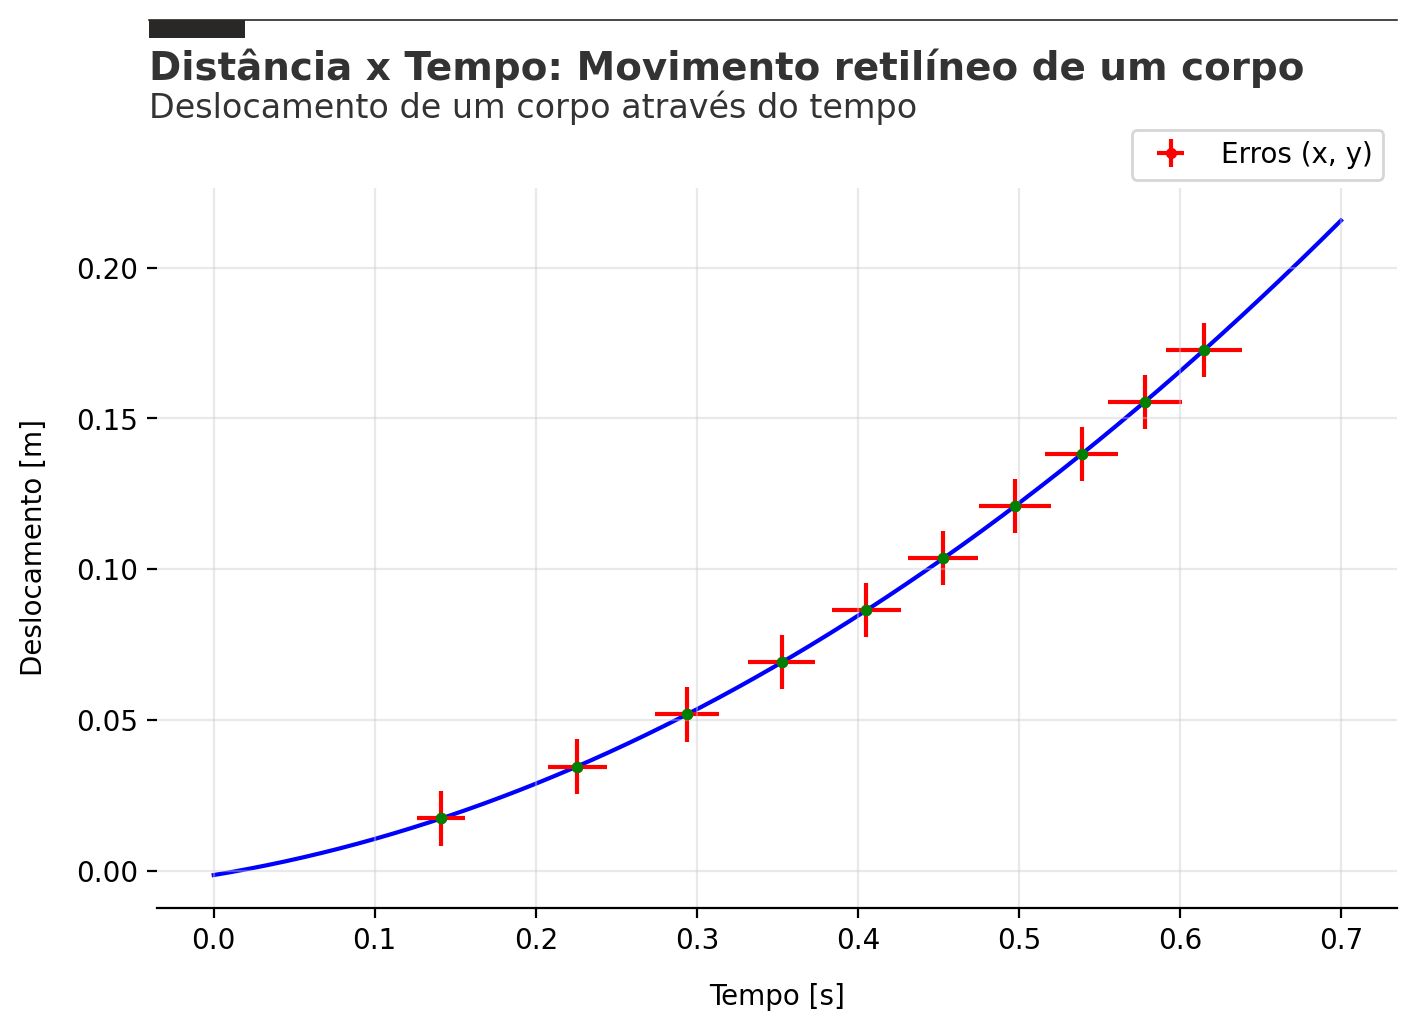

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x1_tempo, y1_deslocamento, erro_deslocamento, erro_tempo, fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x1_tempo, y1_deslocamento, s = 10, c = "green", zorder = 2)
ax.plot(xfit_poly, yfit_poly, c = "blue", zorder = 0)


ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Deslocamento [m]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Distância x Tempo: Movimento retilíneo de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Deslocamento de um corpo através do tempo", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_5/primeira_metro_x_tempo.png")

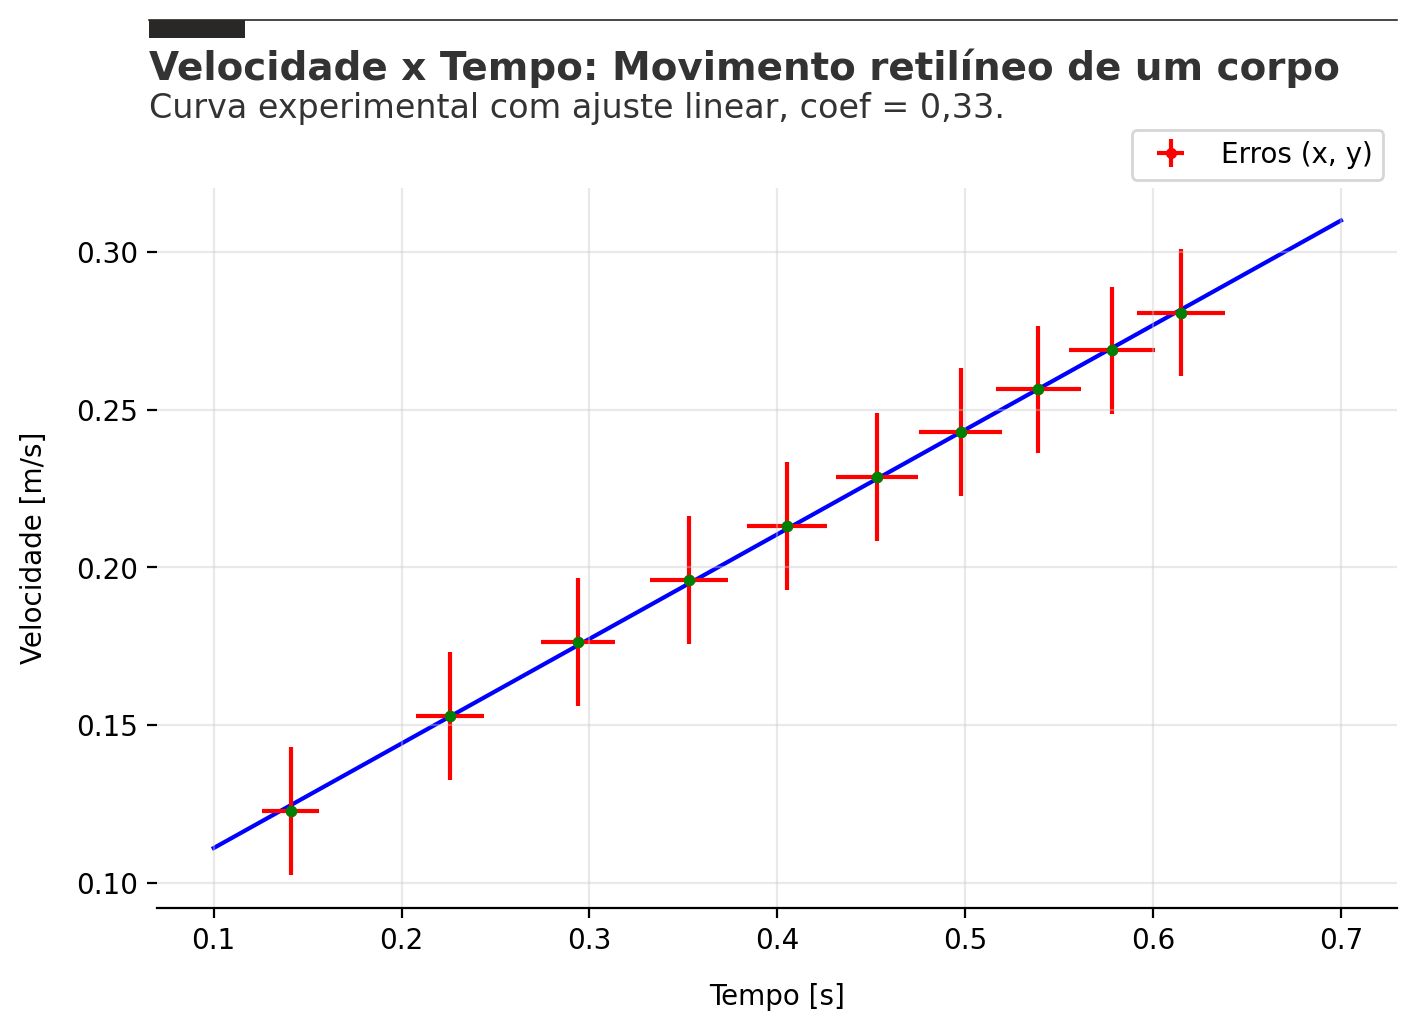

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x1_tempo, y1_velocidade, erro_velocidade, erro_tempo, fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x1_tempo, y1_velocidade, s = 10, c = "green", zorder = 2)
ax.plot(xfit, yfit, c = "blue", zorder = 0)


ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Velocidade [m/s]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Velocidade x Tempo: Movimento retilíneo de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Curva experimental com ajuste linear, coef = 0,33.", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_5/primeira_velocidade_x_tempo.png")

## Segunda coleta de dados

In [ ]:
df2 = df.loc[15: 24].copy().reset_index().drop(columns="index")

df2 = df2.astype("float")

In [ ]:
df2

,tempo_1,tempo_2,tempo_3,tempo_4,tempo_5,media
0,0.18370,0.25540,0.22690,0.32075,0.18340,0.23403
1,0.31605,0.42310,0.37805,0.49795,0.31760,0.38655
2,0.42740,0.54945,0.50130,0.62815,0.43115,0.50749
3,0.52620,0.65715,0.60775,0.73825,0.53135,0.61214
4,0.61575,0.75350,0.70260,0.83610,0.62170,0.70593
5,0.69820,0.84155,0.78765,0.92525,0.70335,0.79120
6,0.77535,0.92255,0.86620,1.00710,0.77900,0.87004
7,0.84555,0.99790,0.94015,1.08300,0.85060,0.94344
8,0.91720,1.06910,1.01005,1.15475,0.91835,1.01389
9,0.98220,1.13700,1.07640,1.22305,0.98305,1.08034


In [ ]:
x2_tempo = df2["media"]

y2_deslocamento = deslocamento[0]
y2_velocidade = (y2_deslocamento / x2_tempo)

erro_deslocamento = 0.009

std2 = df2.drop(columns = "media").std(axis = 1)
erro_tempo2 = std2 / np.sqrt(5)

erro_velocidade2 = y2_velocidade.mean() * ((erro_deslocamento) / y2_deslocamento.mean())

In [ ]:
erro_tempo2

0    0.025617
1    0.034309
2    0.037815
3    0.039913
4    0.041500
5    0.042944
6    0.044052
7    0.045086
8    0.045487
9    0.046200
dtype: float64

### Modelo linear para Velocidade x Tempo

In [ ]:
model2 = LinearRegression(fit_intercept = True)

model2.fit(x2_tempo[:, None], y2_velocidade)

xfit2 = np.linspace(0.1, 1.15, 10000)
yfit2 = model2.predict(xfit2[:, None])

<ipython-input-320-fcb73b49c64d>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model2.fit(x2_tempo[:, None], y2_velocidade)


In [ ]:
scores = cross_val_score(model2, x2_tempo[:, None], y2_velocidade, cv = 5)

scores.mean()

<ipython-input-321-38c6ba4d0ced>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores = cross_val_score(model2, x2_tempo[:, None], y2_velocidade, cv = 5)


0.9883063431275791

In [ ]:
model2.coef_

array([0.10180501])

### Modelo polinomial quadrático para Deslocamento x Tempo

In [ ]:
poly_model2 = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

In [ ]:
xfit_poly2 = np.linspace(0, 1.1, 1000)

poly_model2.fit(x2_tempo[:, None], y2_deslocamento)
yfit_poly2 = poly_model2.predict(xfit_poly2[:, None])

<ipython-input-324-7129d80157bb>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model2.fit(x2_tempo[:, None], y2_deslocamento)


In [ ]:
scores = cross_val_score(poly_model2, x2_tempo[:, None], y2_velocidade, cv = 5)

scores.mean()

<ipython-input-325-9c348fcc562e>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores = cross_val_score(poly_model2, x2_tempo[:, None], y2_velocidade, cv = 5)


0.9963826640104296

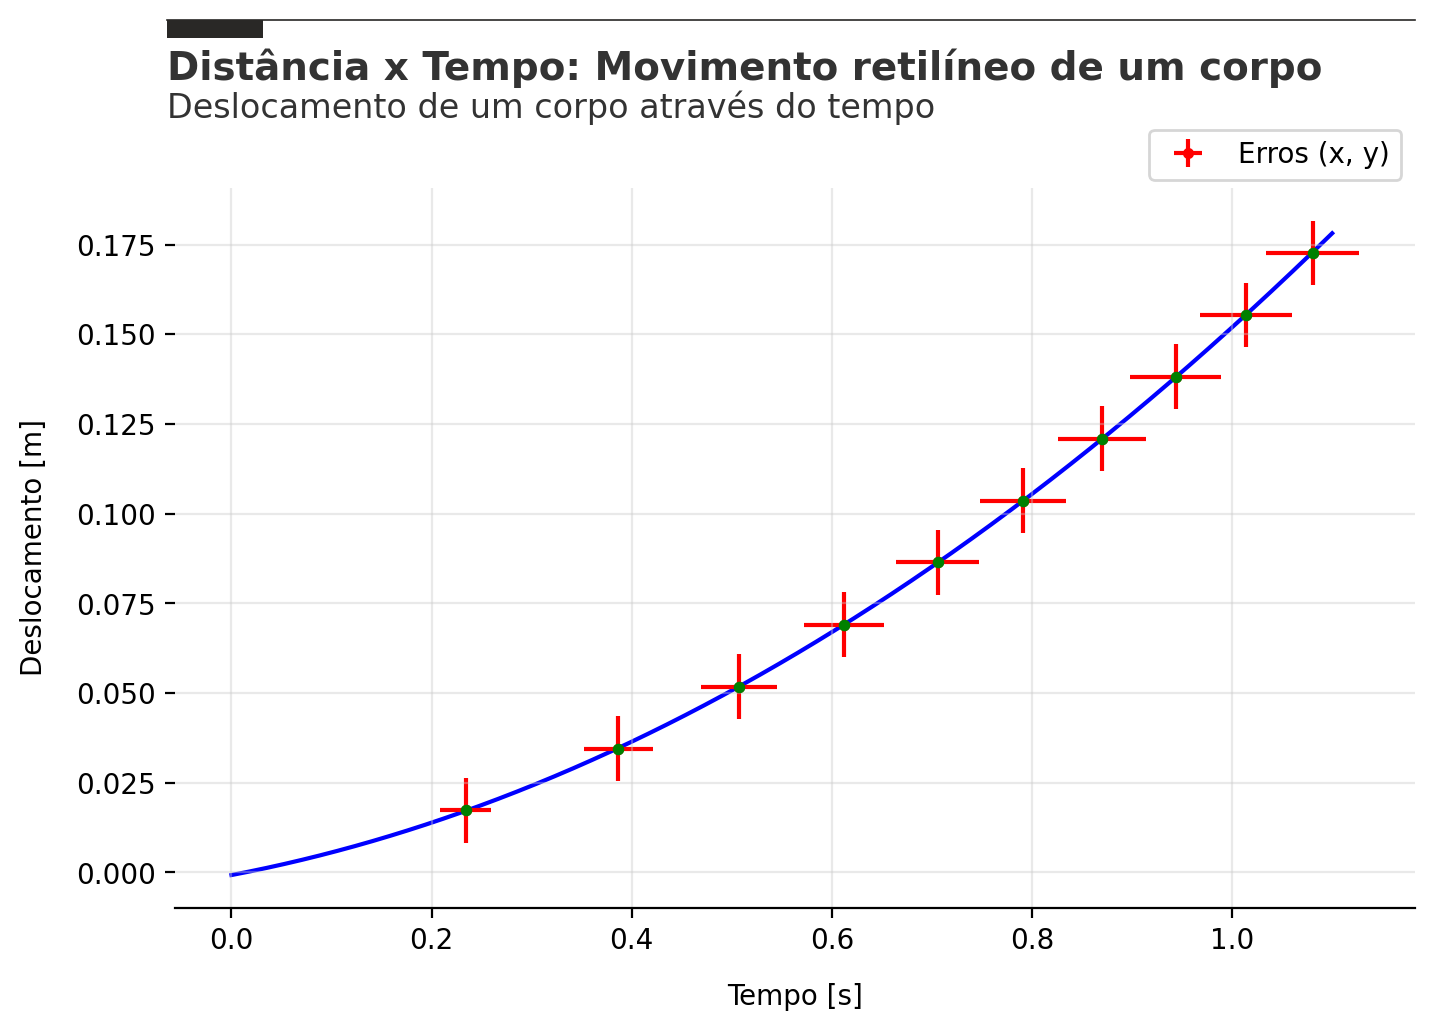

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x2_tempo, y2_deslocamento, erro_deslocamento, erro_tempo2, fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x2_tempo, y2_deslocamento, s = 10, c = "green", zorder = 2)
ax.plot(xfit_poly2, yfit_poly2, c = "blue", zorder = 0)


ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Deslocamento [m]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Distância x Tempo: Movimento retilíneo de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Deslocamento de um corpo através do tempo", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_5/segunda_metro_x_tempo.png")

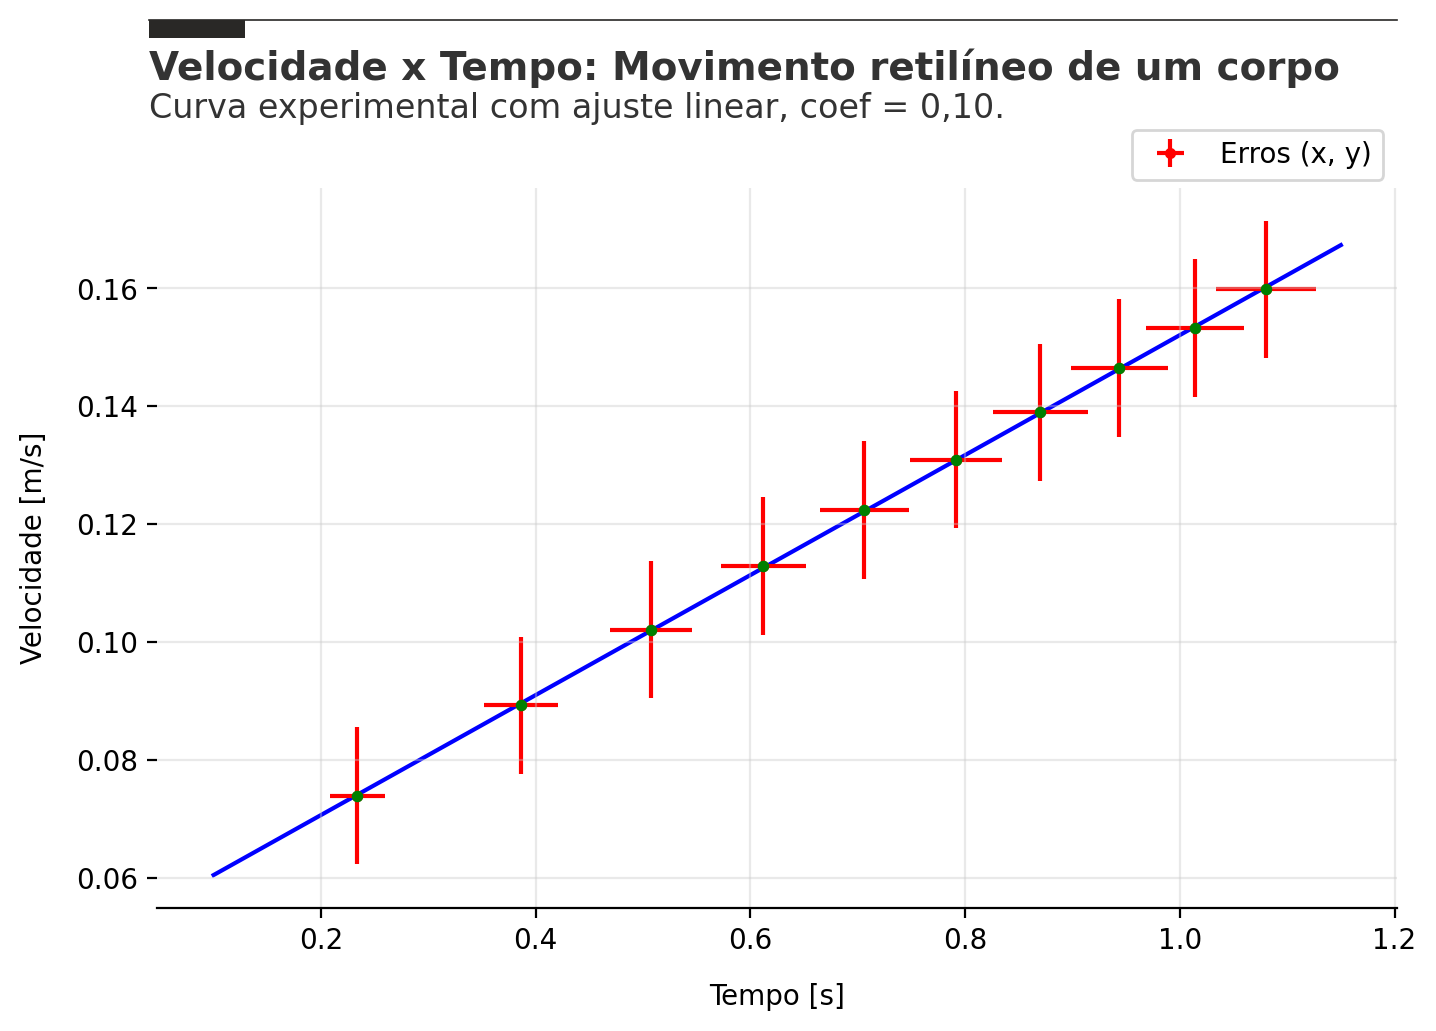

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x2_tempo, y2_velocidade, erro_velocidade2, erro_tempo2, fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x2_tempo, y2_velocidade, s = 10, c = "green", zorder = 2)
ax.plot(xfit2, yfit2, c = "blue", zorder = 0)


ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Velocidade [m/s]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Velocidade x Tempo: Movimento retilíneo de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Curva experimental com ajuste linear, coef = 0,10.", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_5/segunda_velocidade_x_tempo.png")

In [ ]:
aceleracao2 = [0.10 for i in range(10)]

erro_aceleracao2 = 0.10 * ((y2_velocidade.std() / np.sqrt(10)) / y2_velocidade.mean())

In [ ]:
erro_aceleracao2

0.007287952819590185

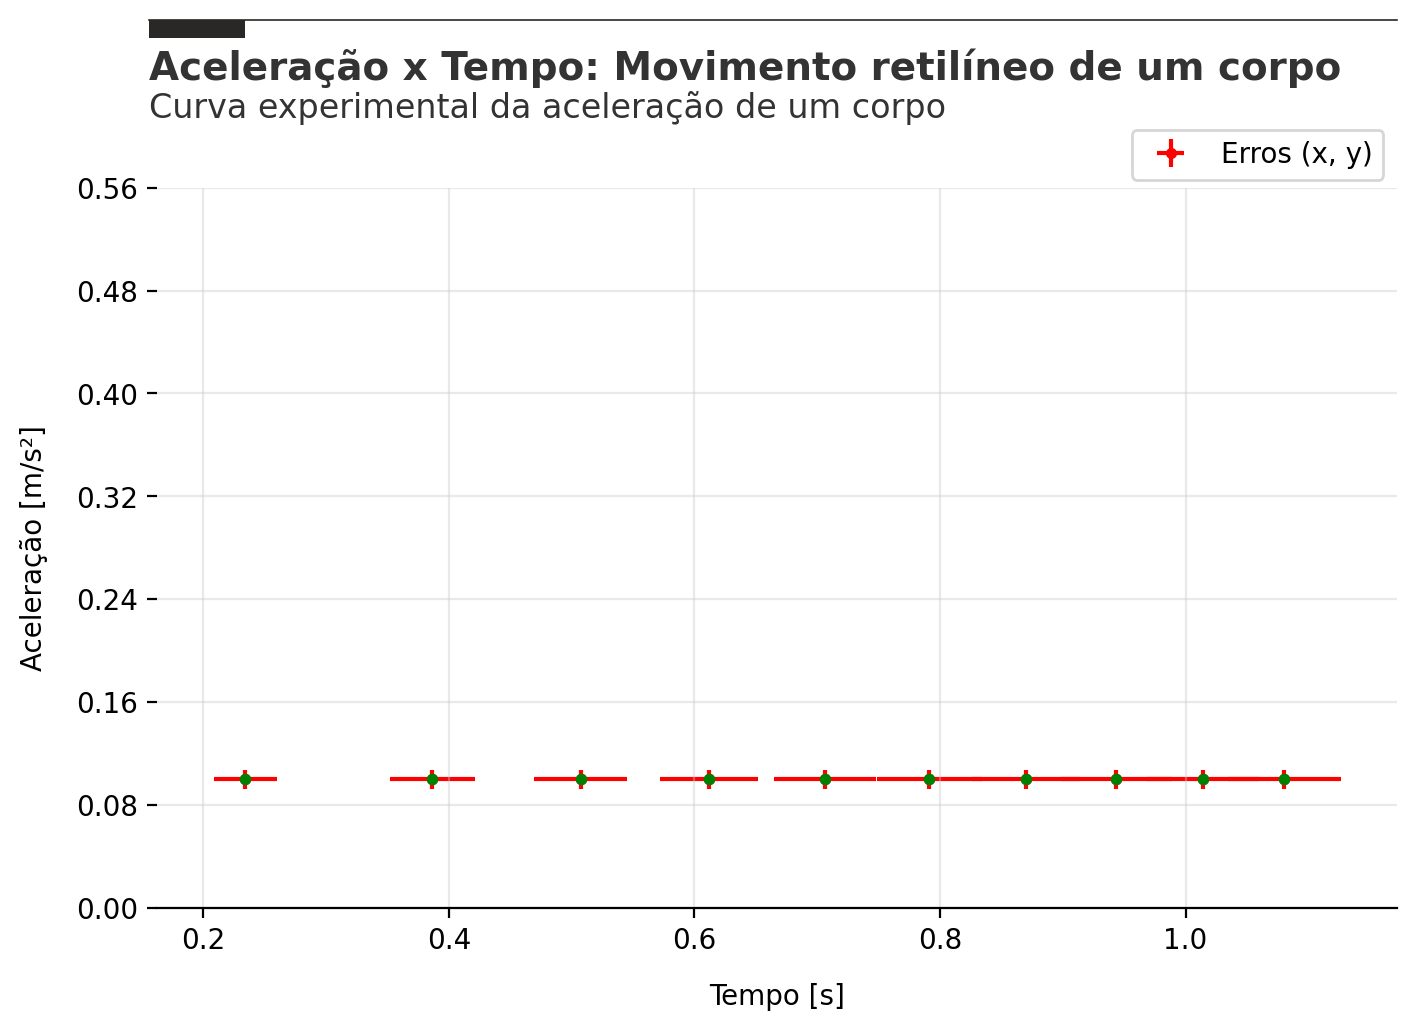

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x2_tempo, aceleracao2, erro_aceleracao2, erro_tempo2, fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x2_tempo, aceleracao2, s = 10, c = "green", zorder = 2)


ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Aceleração [m/s²]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Aceleração x Tempo: Movimento retilíneo de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Curva experimental da aceleração de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks(np.arange(0, 0.56, 0.08))

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_5/segunda_aceleracao_x_tempo.png")

## Coleta de dados com ângulo igual a 1 grau

In [ ]:
df3 = df.loc[28: 37].copy().reset_index().drop(columns = "index")

In [ ]:
df3 = df3.astype("float")

In [ ]:
df3

,tempo_1,tempo_2,tempo_3,tempo_4,tempo_5,media
0,0.20360,NaN,NaN,NaN,NaN,NaN
1,0.29950,NaN,NaN,NaN,NaN,NaN
2,0.37380,NaN,NaN,NaN,NaN,NaN
3,0.43690,NaN,NaN,NaN,NaN,NaN
4,0.49230,NaN,NaN,NaN,NaN,NaN
5,0.54230,NaN,NaN,NaN,NaN,NaN
6,0.58850,NaN,NaN,NaN,NaN,NaN
7,0.63190,NaN,NaN,NaN,NaN,NaN
8,0.67275,NaN,NaN,NaN,NaN,NaN
9,0.71170,NaN,NaN,NaN,NaN,NaN


In [361]:
x3_tempo = df3["tempo_1"]

y3_deslocamento = deslocamento[0]
y3_velocidade = (y3_deslocamento / x3_tempo)

erro_deslocamento = 0.009
erro_tempo3 = 0.00005
erro_velocidade3 = y3_velocidade.mean() * ((erro_deslocamento) / y3_deslocamento.mean())

### Modelo linear para Velocidade x Tempo

In [ ]:
model3 = LinearRegression(fit_intercept = True)

model3.fit(x3_tempo[:, None], y3_velocidade)

xfit3 = np.linspace(0.1, 0.75, 10000)
yfit3 = model3.predict(xfit3[:, None])

<ipython-input-335-58604d8787d8>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model3.fit(x3_tempo[:, None], y3_velocidade)


In [ ]:
scores = cross_val_score(model3, x3_tempo[:, None], y3_velocidade, cv = 5)

scores.mean()

<ipython-input-336-5a1a89ce3cc3>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores = cross_val_score(model3, x3_tempo[:, None], y3_velocidade, cv = 5)


0.9915309685949764

In [ ]:
model3.coef_

array([0.31071334])

### Modelo polinomial quadrático para Deslocamento x Tempo

In [ ]:
poly_model3 = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

In [ ]:
xfit_poly3 = np.linspace(0, 0.75, 1000)

poly_model3.fit(x3_tempo[:, None], y3_deslocamento)
yfit_poly3 = poly_model3.predict(xfit_poly3[:, None])

<ipython-input-339-248cf9398159>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model3.fit(x3_tempo[:, None], y3_deslocamento)


In [ ]:
scores = cross_val_score(poly_model3, x3_tempo[:, None], y3_velocidade, cv = 5)

scores.mean()

<ipython-input-340-84ec70ea166b>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores = cross_val_score(poly_model3, x3_tempo[:, None], y3_velocidade, cv = 5)


0.9973853951804437

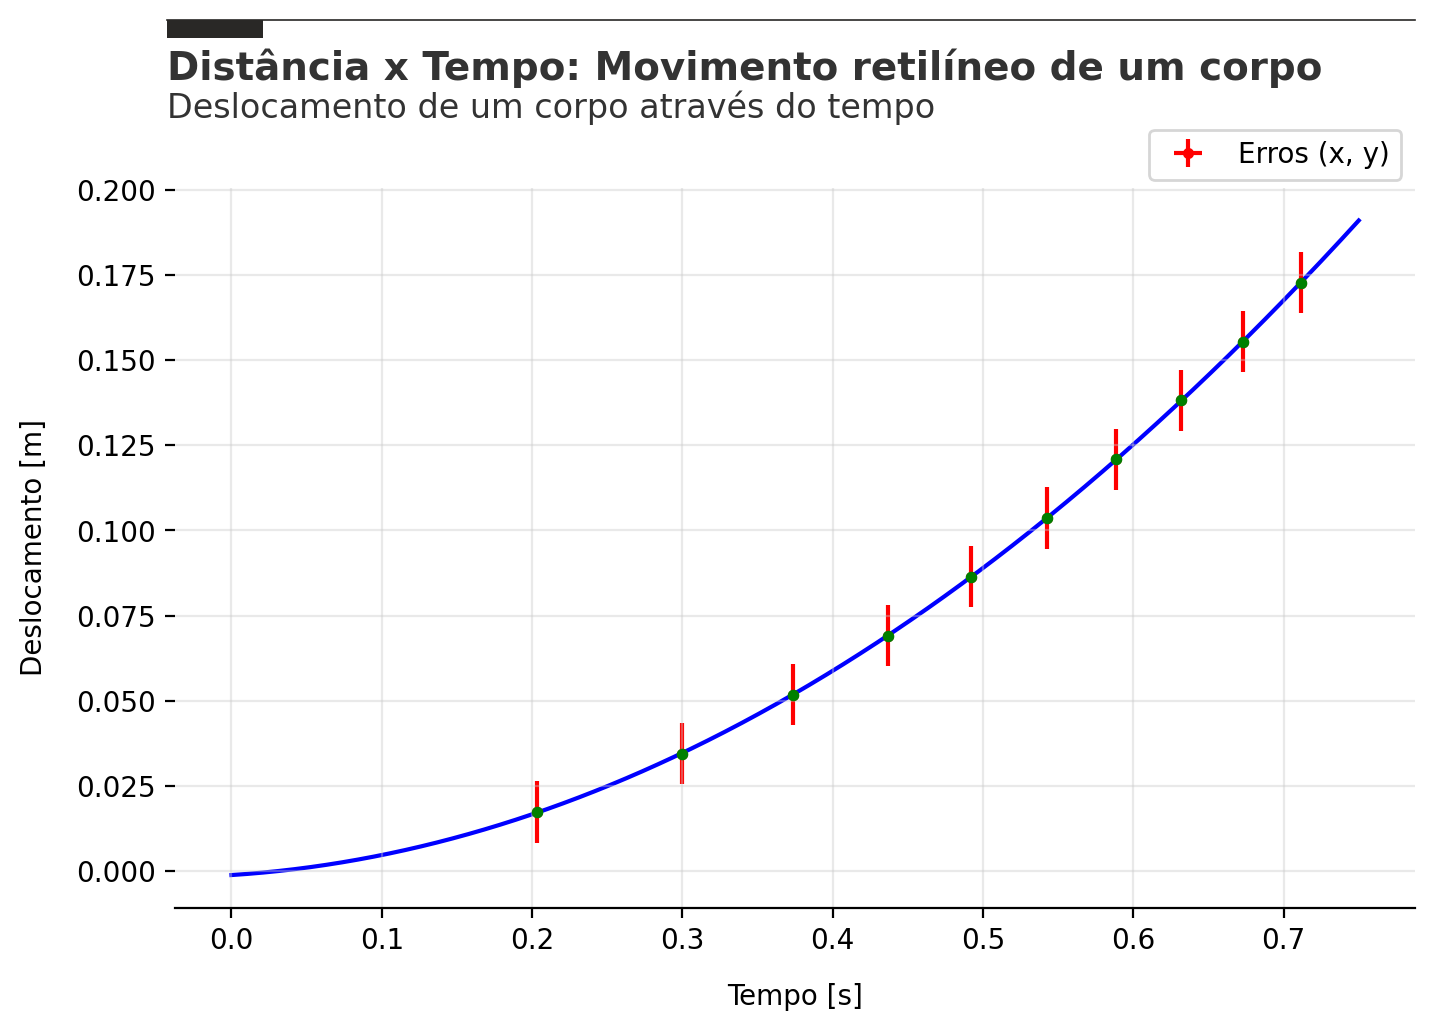

In [362]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x3_tempo, y3_deslocamento, erro_deslocamento, erro_tempo3, fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x3_tempo, y3_deslocamento, s = 10, c = "green", zorder = 2)
ax.plot(xfit_poly3, yfit_poly3, c = "blue", zorder = 0)


ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Deslocamento [m]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Distância x Tempo: Movimento retilíneo de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Deslocamento de um corpo através do tempo", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_5/terceira_metro_x_tempo.png")

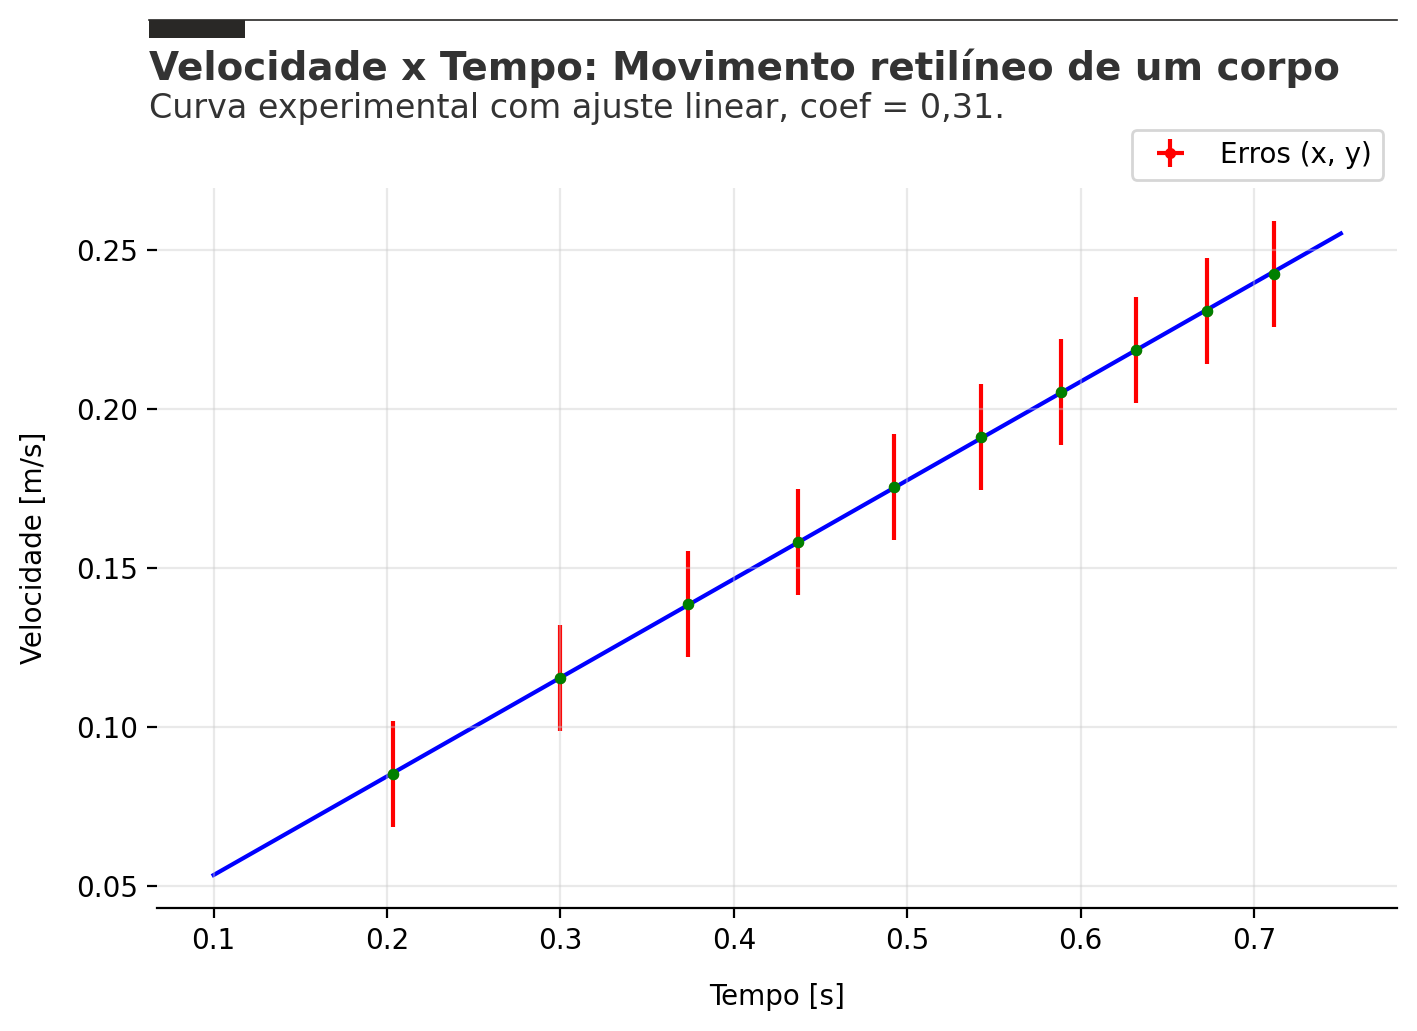

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x3_tempo, y3_velocidade, erro_velocidade3, erro_tempo3, fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x3_tempo, y3_velocidade, s = 10, c = "green", zorder = 2)
ax.plot(xfit3, yfit3, c = "blue", zorder = 0)


ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Velocidade [m/s]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Velocidade x Tempo: Movimento retilíneo de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Curva experimental com ajuste linear, coef = 0,31.", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_5/terceira_velocidade_x_tempo.png")

In [ ]:
aceleracao3 = [0.31 for i in range(10)]

erro_aceleracao3 = 0.31 * ((y3_velocidade.std() / np.sqrt(10)) / y3_velocidade.mean())

In [ ]:
erro_aceleracao3

0.02879473528506696

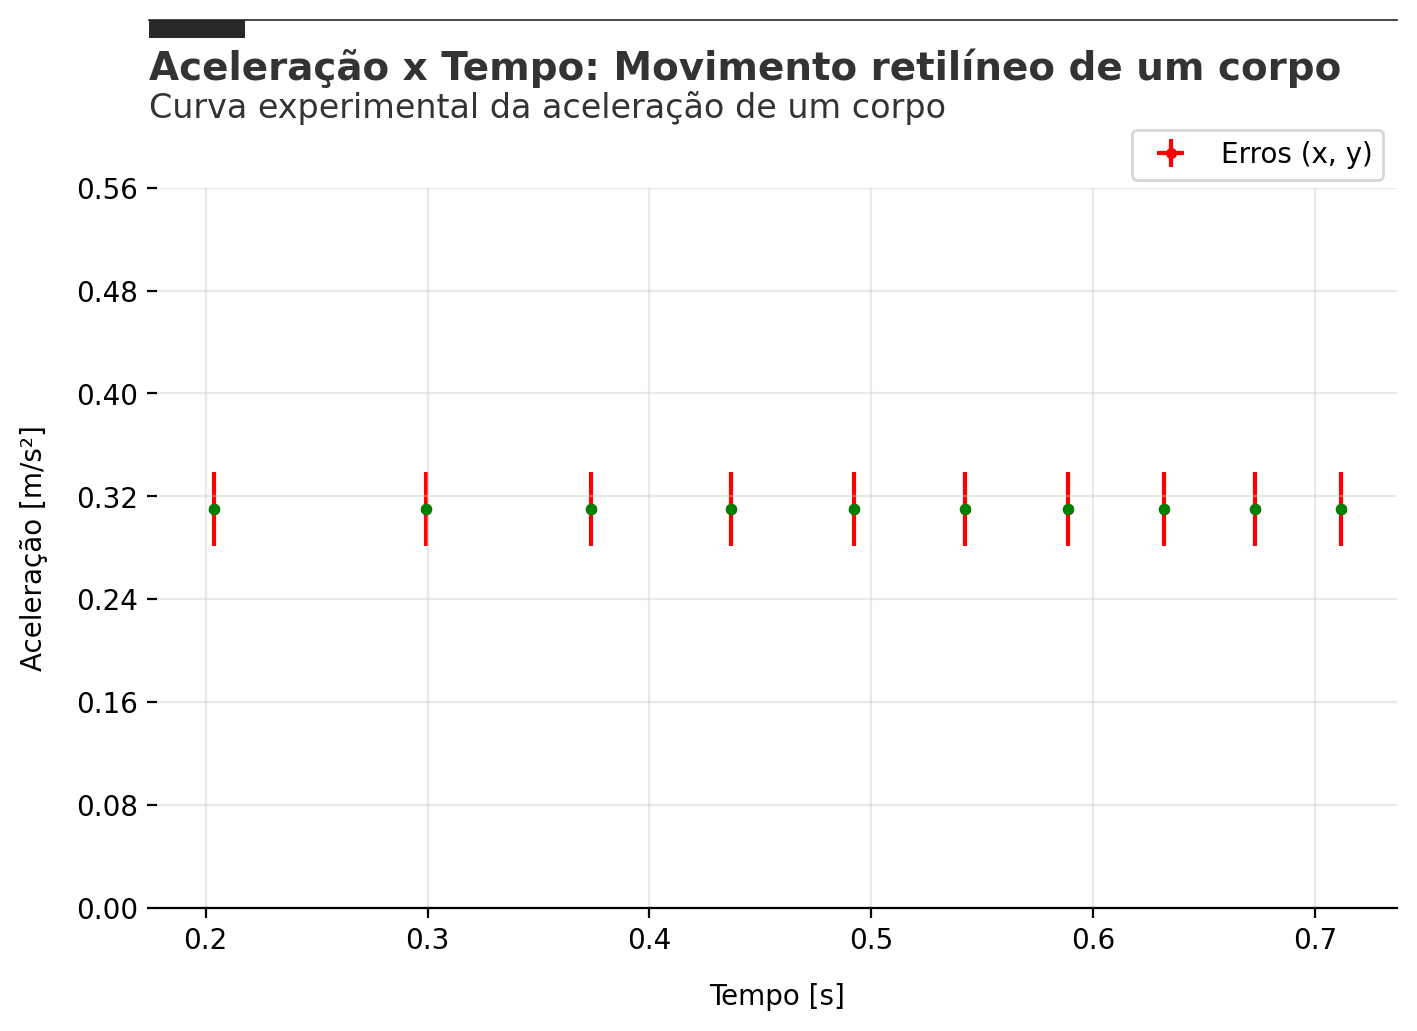

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x3_tempo, aceleracao3, erro_aceleracao3, erro_tempo3, fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x3_tempo, aceleracao3, s = 10, c = "green", zorder = 2)

ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Aceleração [m/s²]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Aceleração x Tempo: Movimento retilíneo de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Curva experimental da aceleração de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks(np.arange(0, 0.56, 0.08))

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_5/terceira_aceleracao_x_tempo.png")

## Coleta de dados com ângulo igual a 3 graus

In [ ]:
df4 = df.loc[41: 50].copy().reset_index().drop(columns = "index")

In [ ]:
df4 = df4.astype("float")

In [ ]:
df4

,tempo_1,tempo_2,tempo_3,tempo_4,tempo_5,media
0,0.17860,NaN,NaN,NaN,NaN,NaN
1,0.30045,NaN,NaN,NaN,NaN,NaN
2,0.40045,NaN,NaN,NaN,NaN,NaN
3,0.48790,NaN,NaN,NaN,NaN,NaN
4,0.56640,NaN,NaN,NaN,NaN,NaN
5,0.63800,NaN,NaN,NaN,NaN,NaN
6,0.70310,NaN,NaN,NaN,NaN,NaN
7,0.76385,NaN,NaN,NaN,NaN,NaN
8,0.82140,NaN,NaN,NaN,NaN,NaN
9,0.87615,NaN,NaN,NaN,NaN,NaN


In [ ]:
x4_tempo = df4["tempo_1"]

y4_deslocamento = deslocamento[0]
y4_velocidade = (y4_deslocamento / x4_tempo)

erro_deslocamento = 0.009
erro_velocidade4 = y4_velocidade.mean() * ((erro_deslocamento) / y4_deslocamento.mean())

### Modelo linear para Velocidade x Tempo

In [ ]:
model4 = LinearRegression(fit_intercept = True)

model4.fit(x4_tempo[:, None], y4_velocidade)

xfit4 = np.linspace(0.1, 0.90, 10000)
yfit4 = model4.predict(xfit4[:, None])

<ipython-input-350-95e6c1debdc0>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model4.fit(x4_tempo[:, None], y4_velocidade)


In [ ]:
scores = cross_val_score(model4, x4_tempo[:, None], y4_velocidade, cv = 5)

scores.mean()

<ipython-input-351-5344209c1dcc>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores = cross_val_score(model4, x4_tempo[:, None], y4_velocidade, cv = 5)


0.9955877636736252

In [ ]:
model4.coef_

array([0.14298733])

### Modelo polinomial quadrático para Deslocamento x Tempo

In [ ]:
poly_model4 = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

In [ ]:
xfit_poly4 = np.linspace(0, 0.95, 1000)

poly_model4.fit(x4_tempo[:, None], y4_deslocamento)
yfit_poly4 = poly_model4.predict(xfit_poly4[:, None])

<ipython-input-354-97aa94d023d7>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model4.fit(x4_tempo[:, None], y4_deslocamento)


In [ ]:
scores = cross_val_score(poly_model4, x4_tempo[:, None], y4_velocidade, cv = 5)

scores.mean()

<ipython-input-355-e69db62bf36f>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  scores = cross_val_score(poly_model4, x4_tempo[:, None], y4_velocidade, cv = 5)


0.9797414731466535

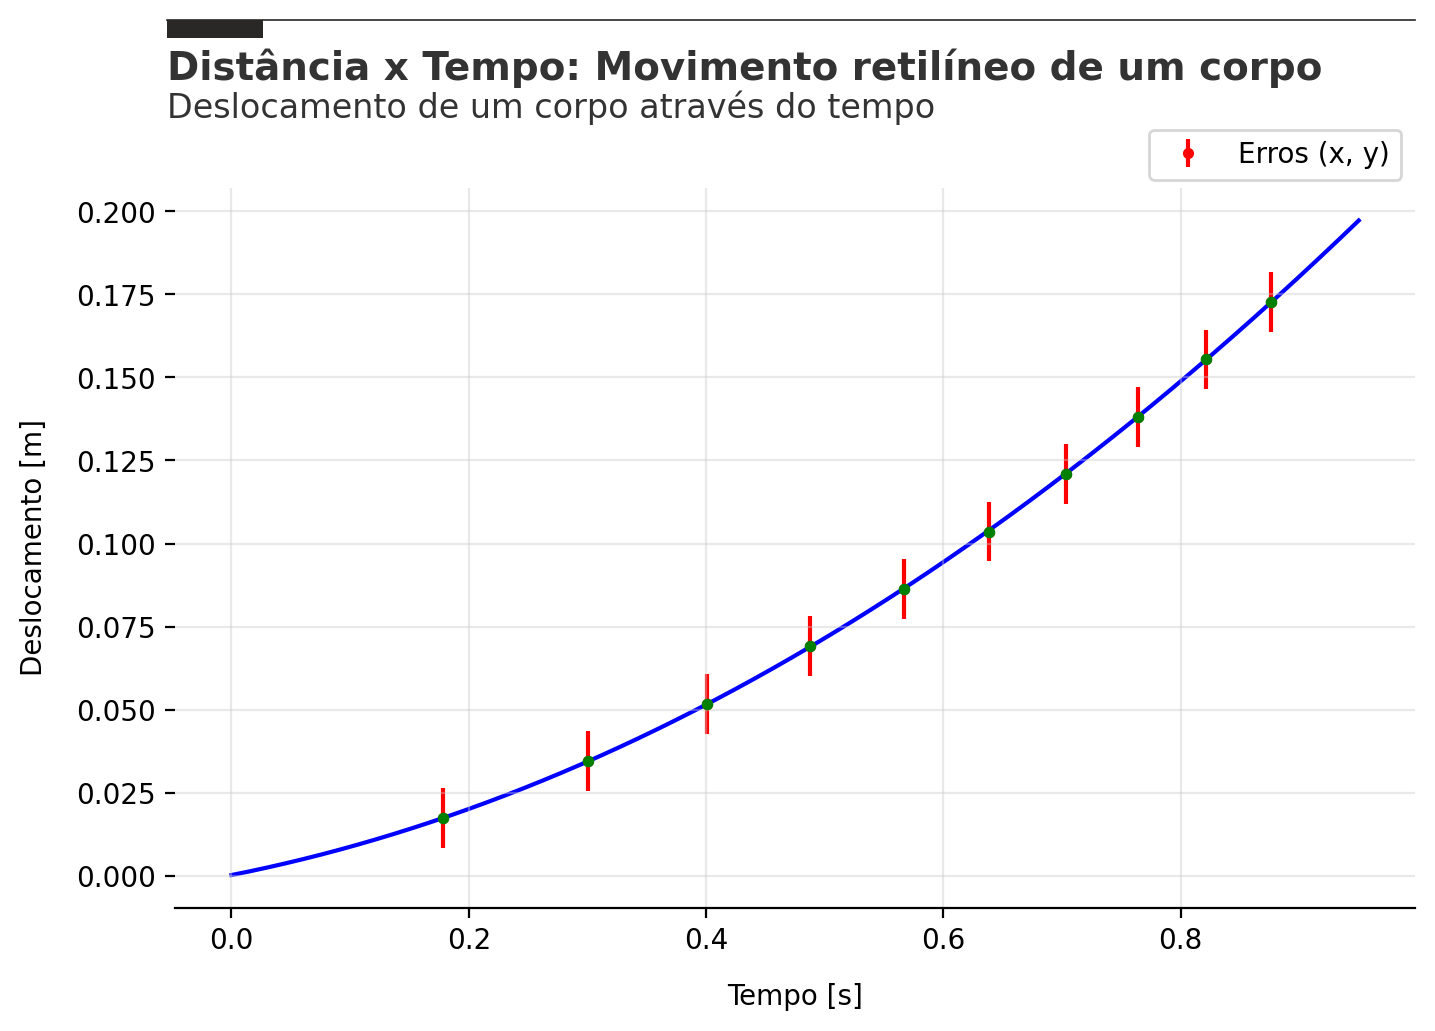

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x4_tempo, y4_deslocamento, erro_deslocamento, fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x4_tempo, y4_deslocamento, s = 10, c = "green", zorder = 2)
ax.plot(xfit_poly4, yfit_poly4, c = "blue", zorder = 0)


ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Deslocamento [m]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Distância x Tempo: Movimento retilíneo de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Deslocamento de um corpo através do tempo", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_5/quarta_metro_x_tempo.png")

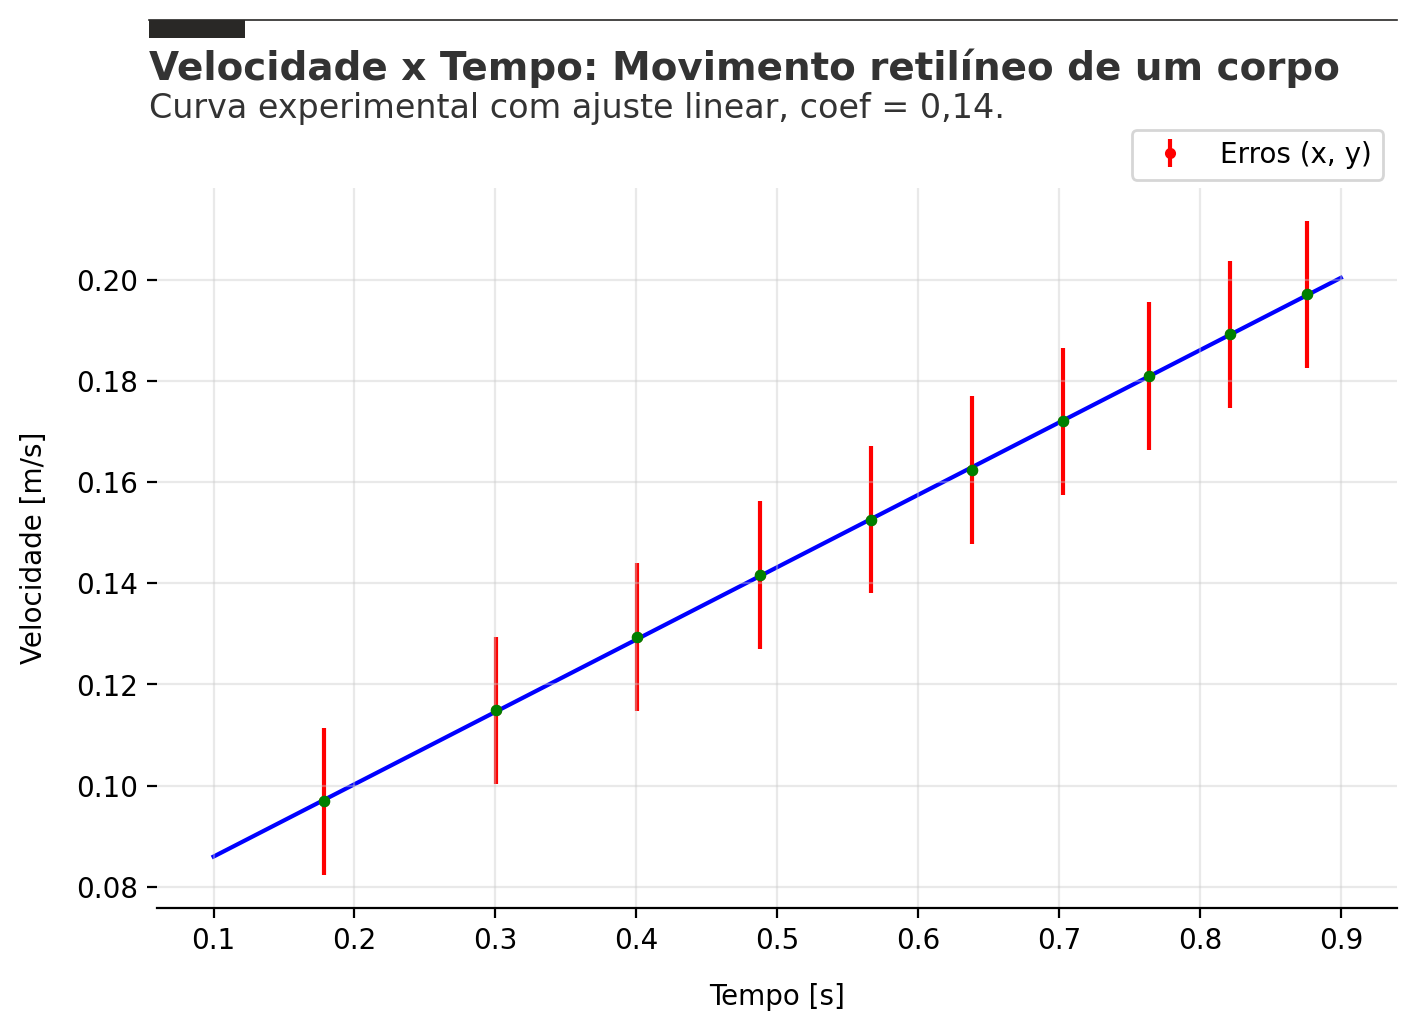

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x4_tempo, y4_velocidade, erro_velocidade4, fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x4_tempo, y4_velocidade, s = 10, c = "green", zorder = 2)
ax.plot(xfit4, yfit4, c = "blue", zorder = 0)


ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Velocidade [m/s]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Velocidade x Tempo: Movimento retilíneo de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Curva experimental com ajuste linear, coef = 0,14.", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_5/quarta_velocidade_x_tempo.png")

In [ ]:
aceleracao4 = [0.14 for i in range(10)]

erro_aceleracao4 = 0.31 * ((y4_velocidade.std() / np.sqrt(10)) / y4_velocidade.mean())

In [ ]:
erro_aceleracao4

0.02102265989491854

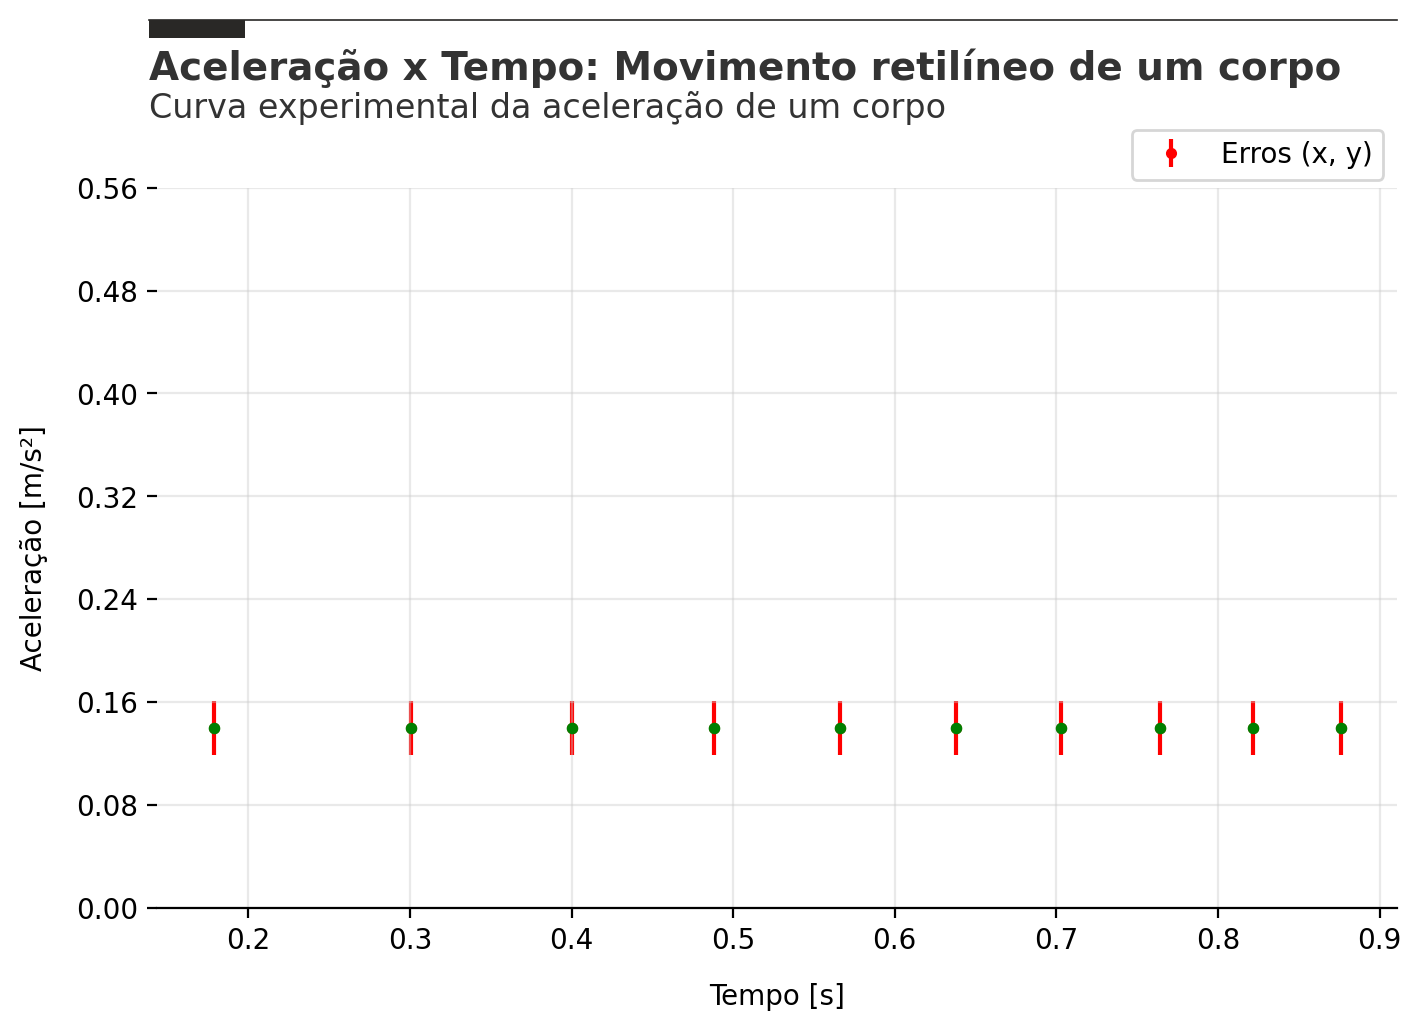

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)


ax.errorbar(x4_tempo, aceleracao4, erro_aceleracao4, fmt = ".", markerfacecolor = "red", markeredgecolor = "red", ecolor = "red", label = "Erros (x, y)", zorder = 1)
ax.scatter(x4_tempo, aceleracao4, s = 10, c = "green", zorder = 2)

ax.grid(which = 'major', axis = 'x', color = '#c9c9c9', alpha = 0.4, zorder = 0)
ax.grid(which = 'major', axis = 'y', color = '#c9c9c9', alpha = 0.4, zorder = 0)

ax.set_ylabel("Aceleração [m/s²]", fontsize = 10, labelpad = 10)
ax.set_xlabel("Tempo [s]", fontsize = 10, labelpad = 10)

ax.plot([0.12, 0.9], [0.94, 0.94], transform = fig.transFigure, clip_on = False, color = '#292826', linewidth = 0.6)
ax.add_patch(plt.Rectangle((0.12, 0.94), 0.06, -0.015, facecolor = '#292826', transform = fig.transFigure, clip_on = False, linewidth = 0))

plt.subplots_adjust(left = None, bottom = 0.2, right = None, top = 0.8, wspace = None, hspace = None)

ax.text(x = 0.12, y = 0.89, s = "Aceleração x Tempo: Movimento retilíneo de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.858, s = "Curva experimental da aceleração de um corpo", transform = fig.transFigure, ha = 'left', fontsize = 12, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks(np.arange(0, 0.56, 0.08))

ax.legend(loc = "best", bbox_to_anchor = [1, 1.1])

plt.savefig("/content/fmt/relatorio_5/quarta_aceleracao_x_tempo.png")